In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import env
import wrangle
import warnings
import evaluate
warnings.filterwarnings('ignore')

In [2]:
df = wrangle.wrangle_zillow()

    bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  taxvaluedollarcnt  \
4          4.0          2.0                        3633.0           296425.0   
6          3.0          4.0                        1620.0           847770.0   
7          3.0          2.0                        2077.0           646760.0   
11         0.0          0.0                        1200.0             5328.0   
14         0.0          0.0                         171.0             6920.0   

    yearbuilt  taxamount    fips  
4      2005.0    6941.39  6037.0  
6      2011.0   10244.94  6037.0  
7      1926.0    7924.68  6037.0  
11     1972.0      91.60  6037.0  
14     1973.0     255.17  6037.0  


Load your zillow dataset.

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [3]:
df.columns = ['bedrooms','bathrooms','sq_feet','tax_value','year_built','tax_amount','fips']

In [4]:
df = df.drop(columns='tax_amount')

In [5]:
train, validate = train_test_split(df, random_state=123)
train, test = train_test_split(train)

In [6]:
train['baseline'] = train.tax_value.mean()

In [7]:
lr = LinearRegression(normalize=True)

lr.fit(train[['sq_feet']], train.tax_value)

train['yhat'] = lr.predict(train[['sq_feet']])

In [8]:
train['residual'] = train.tax_value - train.yhat
train['b_resid'] = train.tax_value - train.baseline
train.head()

,bedrooms,bathrooms,sq_feet,tax_value,year_built,fips,baseline,yhat,residual,b_resid
835148,2,2.0,1799.0,516592.0,1955,60370,398801.769729,399623.312474,116968.687526,117790.230271
500862,3,1.0,1210.0,298465.0,1952,60370,398801.769729,260200.972167,38264.027833,-100336.769729
57016,3,2.0,2335.0,1154658.0,1937,60370,398801.769729,526500.009255,628157.990745,755856.230271
51778,2,1.0,879.0,172960.0,1947,60590,398801.769729,181849.877700,-8889.877700,-225841.769729
838443,2,1.0,1045.0,812200.0,1950,60590,398801.769729,221143.780061,591056.219939,413398.230271


Plot the residuals for the linear regression model that you made.

Text(0.5, 1.0, 'Linear Regression Residual')

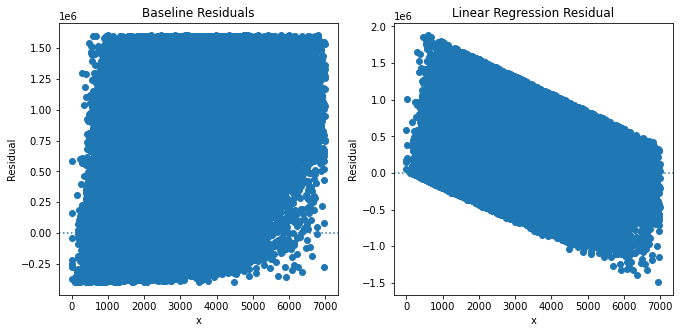

In [9]:
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.sq_feet, train.b_resid)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.sq_feet, train.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Linear Regression Residual')

In [10]:
y = train.tax_value
yhat = train.yhat

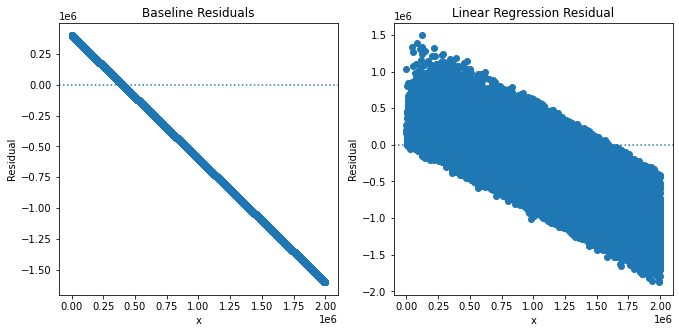

In [11]:
evaluate.plot_residuals(y,yhat)

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

- Sum of Squared Errors
    - (Residuals**2).sum()
- Explained sum of squares
    -  ((yhat-baseline)**2).sum()
- Total sum of squares
    - (Sum of Squared Errors) + (Explained Sum of Squares)
- Mean Squared Error
    - (Sum of Squared Errors)/(Count of Residuals)
- Root Mean Squared Error
    - $ \sqrt(Mean Squared Error) $

In [12]:
train['residual^2'] = train.residual**2
train['b_resid^2'] = train.b_resid**2

In [13]:
SSE = train['residual^2'].sum()
SSE_baseline = train['b_resid^2'].sum()

print('SSE =', "{:.1f}".format(SSE))


SSE = 75608395177246144.0


In [14]:

ESS = sum((train.yhat - train.tax_value.mean())**2)
print('ESS =', "{:.1f}".format(ESS))


ESS = 39753532344644104.0


In [15]:
TSS = ESS + SSE

print('TSS =', "{:.1f}".format(TSS))

TSS = 115361927521890240.0


In [16]:
MSE = SSE/len(train)
print('MSE =', "{:.1f}".format(MSE))

MSE = 64323154936.3


In [17]:
RMSE = sqrt(MSE)
print('SSE =', "{:.1f}".format(SSE))
print('ESS =', "{:.1f}".format(ESS))
print('TSS =', "{:.1f}".format(TSS))
print('MSE =', "{:.1f}".format(MSE))
print('RMSE =', "{:.1f}".format(RMSE))


SSE = 75608395177246144.0
ESS = 39753532344644104.0
TSS = 115361927521890240.0
MSE = 64323154936.3
RMSE = 253620.1


Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [18]:
B_MSE = SSE_baseline/len(train)
B_RMSE = sqrt(B_MSE)

print('SSE baseline =', "{:.1f}".format(SSE_baseline))
print('MSE baseline =', "{:.1f}".format(B_MSE))
print('RMSE baseline =', "{:.1f}".format(B_RMSE))

SSE baseline = 115361927521907200.0
MSE baseline = 98143111229.2
RMSE baseline = 313278.0


Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [19]:
if SSE < SSE_baseline:
    print('The model out performs the baseline!')

The model out performs the baseline!


What is the amount of variance explained in your model?

In [20]:
print(f'The amount of variance explained by my model is {r2_score(train.tax_value,train.yhat):%}.')

The amount of variance explained by my model is 34.459837%.


Is your model better than the baseline model?

In [21]:
if (r2_score(train.tax_value,train.yhat)) > (r2_score(train.tax_value, train.baseline)):
    print('Yes!')
else:
    print('No')

Yes!


In [22]:
evaluate.regression_errors(y,yhat)

SSE:  75608395177246144
ESS: -0.000059
TSS:  75608395177246144
MSE:  64323154936
RMSE:  253620


(7.560839517724614e+16,
 -5.8946345234289765e-05,
 7.560839517724614e+16,
 64323154936.29324,
 253620.0996299253)

Create a file named evaluate.py that contains the following functions.

1. plot_residuals(y, yhat): creates a residual plot
2. regression_errors(y, yhat): returns the following values:
3. sum of squared errors (SSE)
4. explained sum of squares (ESS)
5. total sum of squares (TSS)
6. mean squared error (MSE)
7. root mean squared error (RMSE)
8. baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
9. better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false